# This is the analysis and plottign script for the multi time point BF images of size perturbed gastruloids

Examplary analysis of th plots shown in Fig 5 C-F and S7 C-G using the data frames extracted from the previous BF analysis scripts, the one stored on Zenodo, or an examplary data frame stored in this repo.

### Imports

In [1]:
import os
import itertools
import matplotlib
import numpy as np
import pandas as pd
from sys import path
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams

cwd = os.getcwd()
modules = cwd.replace('/exe/BF_analysis', '')
path.insert(1, modules)

import modules.configs_setup as configs
import modules.processed_data_analysis as pda

matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.use14corefonts'] = True

### Read in ananlysis configs and data

In [2]:
# read in configs, data, plotting params
raw_data_folder = cwd+'/'

# load configs
cnfgs = configs.load_configs(raw_data_folder)

save_path = raw_data_folder + cnfgs['plots_folder']


# read data
df = pda.load_processed_df(raw_data_folder + cnfgs['merged']['save_name'] , all=True)


# load plotting params
plot_params = configs.load_default_plot_params()

for p,v in plot_params['rcParams'].items():
    rcParams[p] = v
    
fig_format = plot_params['format']
color_dict_sizes2 = cnfgs['color_dict_sizes']
line_style_dict = plot_params['line_style_dict']

group = cnfgs['size_groups']
Condition = cnfgs['conditions']
time_size = cnfgs['time_size']
new_cond = cnfgs['new_cond']
marker_dict_sizes = cnfgs['marker_dict_sizes']
ls_dict = cnfgs['condition_line_styles']

Loaded 2025-01-14_configs.yml.
# rows:  1018


# Morphological analysis

In [3]:
cond_order = ['50', '50x6', '300', '300x4', '1200', '1200/4',]

df['Condition'] = [new_cond[c] for c in df['Condition']]

medianprops = dict(linestyle='None', linewidth=0, color='w')
meanprops = dict(linestyle='-', color='red', linewidth=1)

df_clean = df.copy()
df_clean = df_clean[df_clean['Flag'] != 'All Bad']
df_clean = df_clean[df_clean['Flag'] != 'Bad']

### Fig S7 C

Mean gastruloid area post-manipulation across the two experimental batches. Colors correspond to $N_0$; error bars are s.d.

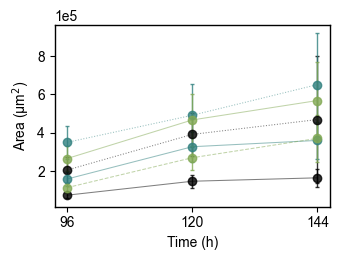

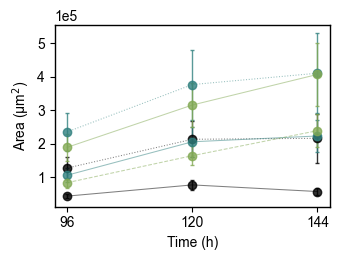

In [4]:
param = 'Area'

for rep in df_clean.Replicate.unique():
    df_r = df_clean[df_clean['Replicate'] == rep]   

    fig, ax = plt.subplots(figsize=(3.5,2.7))
    data_dict = dict()
    for t in df_r.TimePt.unique():
        
        
        df_t = df_r[df_r['TimePt'] == t]
        
        for i, c in enumerate(df_t.Condition.unique()):
            
            col = color_dict_sizes2[c]
            data = df_t[df_t['Condition'] == c]
            x_mean = np.nanmean(data[param])
            x_std = np.nanmean(data[param])/len(data['Area'])**0.5
            
            if (c in ['300x4', '50x6', '1200/4']) and (t == 72):
                x_mean, x_std = np.nan, np.nan
            
            data_dict[f'{t}-{c}'] = [x_mean, x_std]
            
    for c in cond_order:
        keys = [k for k in data_dict.keys() if c in k.split('0-')[1]]
        data = np.zeros((3,2))
    
        for i, t in enumerate(df.TimePt.unique()[1:]):
            x = [96, 120, 144]
            
            if f'{t}-{c}' in data_dict.keys():
                data[i,:] = data_dict[f'{t}-{c}']
                
        data[data == 0] = np.nan
        #data = data[~np.isnan(data).any(axis=1)]
        col = color_dict_sizes2[c]
        ax.plot(x, data[:,0], color=col,  alpha=0.5, markersize=1, label=c, ls=ls_dict[c], lw=0.75)
        ax.errorbar(x, data[:,0], yerr=data[:,1], color=col,  alpha=0.8, label=c, marker='o', linestyle='none', 
                   capsize=1.2)
        

    
    ax.set_xlabel(r'Time (h)')
    ax.set_ylabel(f'{param} (µm$^2$)')
    #ax.set_yticks([0.9, 0.8, 0.7, 0.6])
    ax.set_xticks([96, 120, 144])
    ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    
    #ax.legend(frameon=False, bbox_to_anchor=[1.1,0.9])
    #ax.set_ylim(0, 9.31e5)
    ##ax.set_xlim(0.9, 3.2)
    
    fig.tight_layout()
    #plt.savefig(save_path + f'olympus_3X_fusion_{param}_timecourse_Rep{rep}_color.svg', dpi=200, transparent=True)
    
    plt.show()
    

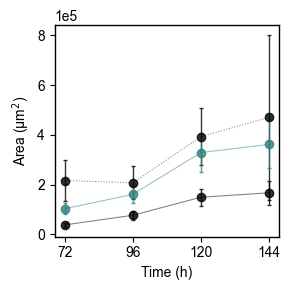

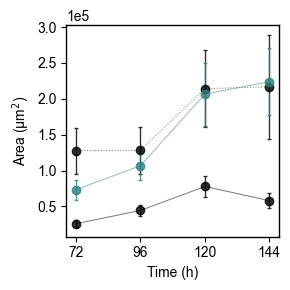

In [5]:
param = 'Area'

for rep in df_clean.Replicate.unique():
    df_r = df_clean[df_clean['Replicate'] == rep]   

    fig, ax = plt.subplots(figsize=(3.,3))
    data_dict = dict()
    for t in df_r.TimePt.unique():
        
        
        df_t = df_r[df_r['TimePt'] == t]
        
        for i, c in enumerate(df_t.Condition.unique()):
            
            col = color_dict_sizes2[c]
            data = df_t[df_t['Condition'] == c]
            x_mean = np.nanmean(data[param])
            x_std = np.nanmean(data[param])/len(data['Area'])**0.5
            
            data_dict[f'{t}-{c}'] = [x_mean, x_std]
            
    for c in cond_order:
        if not c in ['50', '50x6', '300']:
            continue
            
        keys = [k for k in data_dict.keys() if c in k.split('0-')[1]]
        data = np.zeros((4,2))
    
        for i, t in enumerate(df.TimePt.unique()):
            x = [72, 96, 120, 144]
            
            if f'{t}-{c}' in data_dict.keys():
                data[i,:] = data_dict[f'{t}-{c}']
                
        data[data == 0] = np.nan
        #data = data[~np.isnan(data).any(axis=1)]
        col = color_dict_sizes2[c]
        ax.plot(x, data[:,0], color=col,  alpha=0.5, markersize=1, label=c, ls=ls_dict[c], lw=0.75)
        ax.errorbar(x, data[:,0], yerr=data[:,1], color=col,  alpha=0.8, label=c, marker='o', linestyle='none', 
                   capsize=1.2)
        

    
    ax.set_xlabel(r'Time (h)')
    ax.set_ylabel(f'{param} (µm$^2$)')
    #ax.set_yticks([0.9, 0.8, 0.7, 0.6])
    ax.set_xticks([72, 96, 120, 144])
    ax.ticklabel_format(style='sci',scilimits=(0,0),axis='y')
    
    #ax.legend(frameon=False, bbox_to_anchor=[1.1,0.9])
    #ax.set_ylim(0, 9.31e5)
    ##ax.set_xlim(0.9, 3.2)
    
    fig.tight_layout()
    #plt.savefig(save_path + f'olympus_3X_fusion_{param}_timecourse_Rep{rep}_small_fused.svg', dpi=200, transparent=True)
    
    plt.show()
    

### Fig 5 D, S7 E

Mean gastruloid area at a given time (72h, 96h, 120h, 144h) across control, cut, and fused gastruloids. 
Boxplots show group mean, with whiskers extending to the farthest data point within 1.5x the interquartile range (IQR).

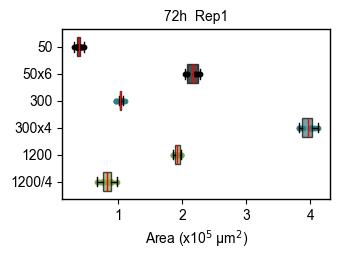

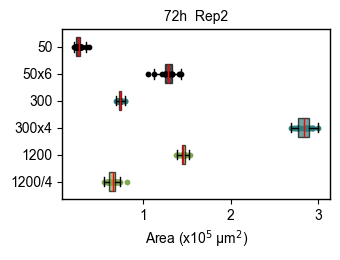

In [6]:
for rep in df_clean.Replicate.unique():
        
    df_r = df_clean[df_clean['Replicate'] == rep]
    
    for t in df_r.TimePt.unique():
        df_t = df_r[df_r['TimePt']==t]
    
        fig, ax = plt.subplots(1, 1, figsize=(3.5,2.7))
        
        for i, group in enumerate(cond_order):
            df_group = df_t[df_t['Condition']== group]
            ax.scatter(df_group['Area']/1e5, [i]*len(df_group['Area']), label=group, 
                          color=color_dict_sizes2[group], s=10)#, marker=marker_dict_sizes[group])
            
            bplot = ax.boxplot(df_group['Area']/1e5, positions=[i], vert=False, widths=0.7, 
                               showfliers=False, meanline=True, showmeans=True, 
                               medianprops = medianprops, meanprops=meanprops, patch_artist=True,)
            
            # fill with colors
            for patch in bplot['boxes']:
                c = color_dict_sizes2[group]
                patch.set_facecolor(c)
                patch.set_alpha(0.7)
            
                        
        ax.set_title(f'{int(t)}h  Rep{rep}')
        ax.set_xlabel(r'Area (x10$^5$ µm$^2$)')
        ax.set_yticks(np.arange(len(cond_order)), labels=cond_order)
        ax.set_ylim(-0.65, 5.65)
        plt.gca().invert_yaxis()
        
        fig.tight_layout()
        #plt.savefig(save_path + f'olympus_3X_fusion_Volume_Rep{rep}_{t}_comp_color.svg', dpi=200, transparent=True)
        plt.show()
        break

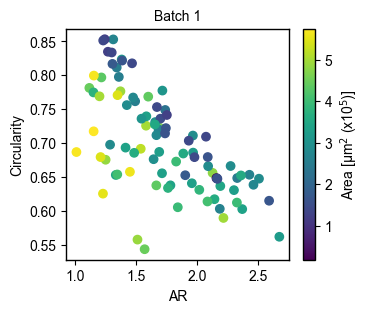

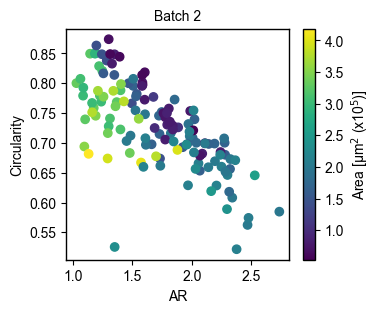

In [7]:
for rep in df_clean.Replicate.unique():
    df_t = df_clean[df_clean['TimePt']==120]
    df_r = df_t[df_t['Replicate'] == rep]
    plt.figure(figsize=(3.6,3))
    plt.scatter( df_r['AR'], df_r['Circularity'], c=df_r['Area']/1e5)
    plt.xlabel('AR')
    plt.ylabel('Circularity')
    plt.title(f'Batch {rep}')
    plt.colorbar(label=r'Area [µm$^2$ (x10$^5$)]')
    plt.show()


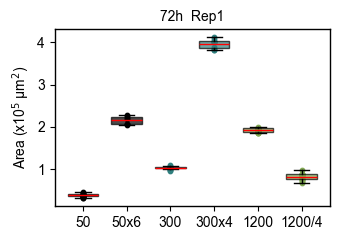

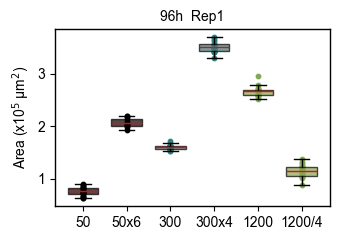

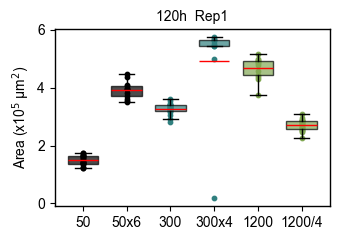

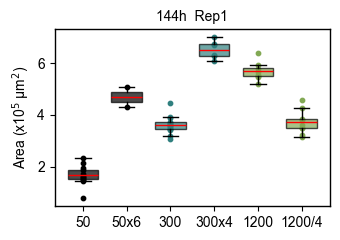

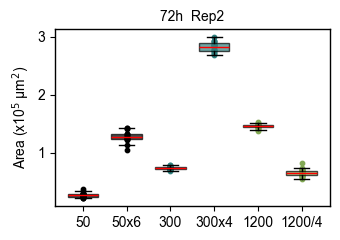

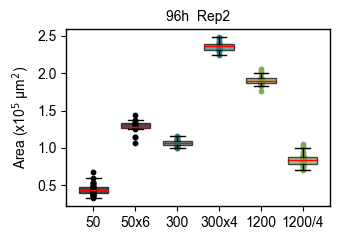

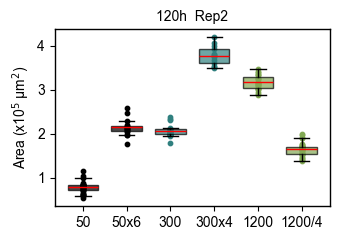

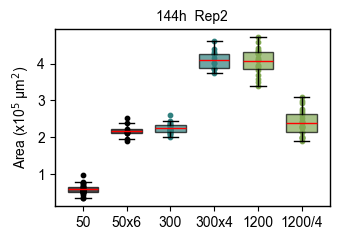

In [8]:
for rep in df_clean.Replicate.unique():
        
    df_r = df_clean[df_clean['Replicate'] == rep]
    
    for t in df_r.TimePt.unique():
        df_t = df_r[df_r['TimePt']==t]
    
        fig, ax = plt.subplots(1, 1, figsize=(3.5,2.5))
        
        for i, group in enumerate(cond_order):
            df_group = df_t[df_t['Condition']== group]
            ax.scatter( [i]*len(df_group['Area']), df_group['Area']/1e5,label=group, 
                          color=color_dict_sizes2[group], s=10)#, marker=marker_dict_sizes[group])
            
            bplot = ax.boxplot(df_group['Area']/1e5, positions=[i], vert=True, widths=0.7, 
                               showfliers=False, meanline=True, showmeans=True, 
                               medianprops = medianprops, meanprops=meanprops, patch_artist=True,)
            
            # fill with colors
            for patch in bplot['boxes']:
                c = color_dict_sizes2[group]
                patch.set_facecolor(c)
                patch.set_alpha(0.7)
            
                        
        ax.set_title(f'{int(t)}h  Rep{rep}')
        ax.set_ylabel(r'Area (x10$^5$ µm$^2$)')
        ax.set_xticks(np.arange(len(cond_order)), labels=cond_order)
        ax.set_xlim(-0.65, 5.65)
        #plt.gca().invert_yaxis()
        
        fig.tight_layout()
        save_path = '/Users/ph6877/Desktop/multi_timepoint/plots/'
        #plt.savefig(save_path + f'olympus_3X_fusion_Volume_Rep{rep}_{t}_comp_color.svg', dpi=200, transparent=True)
        plt.show()
        #break

### Fig 5F, S7 G

Gastruloid aspect ratio (AR) at a given time (72h, 96h, 120h, 144h), used as a proxy for uniaxial elongation. Boxplots show group mean, with whiskers extending to the farthest data point within 1.5x the interquartile range (IQR).

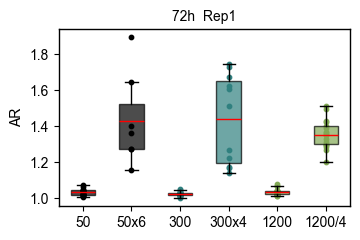

In [9]:
param = 'AR'

for rep in df_clean.Replicate.unique():
    if rep == 2:
        continue
    
    df_r = df_clean[df_clean['Replicate'] == rep]
    
    for t in df_r.TimePt.unique():
        df_t = df_r[df_r['TimePt']==t]
    
        fig, ax = plt.subplots(1, 1, figsize=(3.7,2.5))
        
        for i, group in enumerate(cond_order):
            df_group = df_t[df_t['Condition']== group]
            ax.scatter( [i]*len(df_group[param]),df_group[param], label=group, 
                          color=color_dict_sizes2[group], s=10)#, marker=marker_dict_sizes[group])
            
            bplot = ax.boxplot(df_group[param], positions=[i], vert=True, widths=0.5, 
                               showfliers=False, meanline=True, showmeans=True, 
                               medianprops = medianprops, meanprops=meanprops, patch_artist=True,)
            
            # fill with colors
            for patch in bplot['boxes']:
                c = color_dict_sizes2[group]
                patch.set_facecolor(c)
                patch.set_alpha(0.7)
            
                        
        ax.set_title(f'{int(t)}h  Rep{rep}')
        ax.set_ylabel(param)
        ax.set_xticks(np.arange(len(cond_order)), labels=cond_order)

        fig.tight_layout()
        #plt.savefig(save_path + f'olympus_3X_fusion_{param}_Rep{rep}_{t}_comp_color.svg', dpi=200, transparent=True)
        
        plt.show()
        break

#### Fig 5 F, S7 G significances 

P-values were calculated using a two-sided independent t-test.

- If a p-value is less than 0.05, it is flagged with one star (\*). 
- If a p-value is less than 0.01, it is flagged with 2 stars (\*\*). 
- If a p-value is less than 0.001, it is flagged with three stars (\*\*\*)

In [10]:
param = 'AR'
t = 120

df_stats = pd.DataFrame(index = [0, 1, 2])

for rep in df_clean.Replicate.unique():
    if rep == 1:
        continue
    
    df_r = df_clean[df_clean['Replicate'] == rep]
    df_t = df_r[df_r['TimePt']==t]
    
    for g1, g2 in itertools.combinations(cond_order, 2):
        
        d1 = df_t[df_t['Condition']== g1][param]
        d2 = df_t[df_t['Condition']== g2][param]
        
        if (len(d1) < 3) or (len(d2) <3):
            continue
        
        ttest = stats.ttest_ind(d1, d2,  equal_var=False, nan_policy='omit', alternative='two-sided')
        
        df_stats.loc[0, f'{g1}-{g2}'] = ttest[1]
        df_stats.loc[1, f'{g1}-{g2}'] = int(len(d1))
        df_stats.loc[2, f'{g1}-{g2}'] = int(len(d2))  
        
df_stats.index = ['p-value', r'$N_1$', r'$N_2$']
        
df_stats

,50-50x6,50-300,50-300x4,50-1200,50-1200/4,50x6-300,50x6-300x4,50x6-1200,50x6-1200/4,300-300x4,300-1200,300-1200/4,300x4-1200,300x4-1200/4,1200-1200/4
p-value,0.000067,0.011344,0.000207,1.320594e-12,0.566505,0.213664,2.730895e-08,2.130357e-10,0.000729,0.000002,3.805416e-09,0.051048,0.038268,0.000125,3.813218e-10
$N_1$,30.000000,30.000000,30.000000,3.000000e+01,30.000000,16.000000,1.600000e+01,1.600000e+01,16.000000,22.000000,2.200000e+01,22.000000,13.000000,13.000000,2.300000e+01
$N_2$,16.000000,22.000000,13.000000,2.300000e+01,32.000000,22.000000,1.300000e+01,2.300000e+01,32.000000,13.000000,2.300000e+01,32.000000,23.000000,32.000000,3.200000e+01


### Fig 5 C, S7 D

Mean gastruloid area after perturbation at 72 h for $N_0$ = 300, $N_0$ = 1200, and cut $N_0$= 1200 (1200/4). Boxplots show group mean, with whiskers extending to the farthest data point within 1.5x the interquartile range (IQR). Fold change (fc) for $N_0$ = 1200 : 1200/4 is indicated.

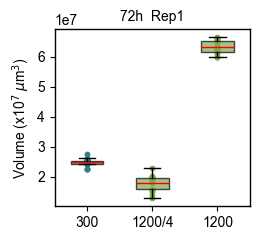

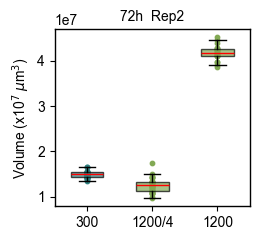

In [11]:
cond_order = [ '300', '1200/4', '1200',]
t = 72
param = 'Area'
medianprops = dict(linestyle='None', linewidth=0, color='w')
meanprops = dict(linestyle='-', color='red', linewidth=1)


df_clean = df.copy()
df_clean = df_clean[df_clean['Flag'] != 'All Bad']
df_clean = df_clean[df_clean['Flag'] != 'Bad']

data_stats = {}

means = []

for rep in df_clean.Replicate.unique():
    df_r = df_clean[df_clean['Replicate'] == rep]
    
    df_t = df_r[df_r['TimePt']==t]
    
    fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.5,))
    
    for i, group in enumerate(cond_order):
        df_group = df_t[df_t['Condition']== group]
        
        areas = df_group[param]
        volumes = list() 

        for area in areas:
            r =  (area/np.pi)**0.5
            volume = 4/3 * np.pi * r**3
            volumes.append(volume)
        
        ax.scatter( [i]*len(volumes), volumes, label=group, 
                      color=color_dict_sizes2[group], s=10)#, marker=marker_dict_sizes[group])
        
        bplot = ax.boxplot(volumes, positions=[i], vert=True, widths=0.5, 
                           showfliers=False, meanline=True, showmeans=True, 
                           medianprops = medianprops, meanprops=meanprops, patch_artist=True,)
        
        means.append(np.nanmin(volumes))
        
        data_stats[f'{rep}-{group}'] = volumes
        
        # fill with colors
        for patch in bplot['boxes']:
            c = color_dict_sizes2[group]
            patch.set_facecolor(c)
            patch.set_alpha(0.7)
            
                    
    ax.set_title(f'{int(t)}h  Rep{rep}')
    ax.set_ylabel(r'Volume (x10$^7$ $\mu$m$^3$)')
    ax.set_xticks(np.arange(len(cond_order)), labels=cond_order)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    fig.tight_layout()
    #plt.savefig(save_path + f'olympus_3X_fusion_vol_Rep{rep}_{t}_small_color2.svg', dpi=200, transparent=True)
    
    plt.show()
    #break

## Elongation, multipolarity, collapsed fractions (from manual counnts)

### Fig 5 E, S7 F

Proportions of gastruloids categorized as uniaxial, multipolar, or collapsed for control and perturbed conditions at 120 h and 144 h, based on manual annotation.

In [12]:
# create new data frame combining some preexisting data that will later be combined with manual counts

#df_exp_stats = pda.prepare_manual_count_df(df)
#cnfgs['df_exp_stats_save_path'] = '/Users/paulinehansen/Desktop/multi_timepoint/elo_multi_collapse.json'
#df_exp_stats.to_json(cnfgs['df_exp_stats_save_path'], orient='split')

df_exp_stats = pda.load_processed_df(raw_data_folder + cnfgs['df_exp_stats_save_path'])
df_exp_stats.head(4)

# rows:  55


,exp,Replicate,TimePt,group,Condition,N,uniaxial,multipolar,collapsed,other
0,231212_1200.4_postcut,1,72.0,300.0,1200/4,20,0,0,0,20
1,231212_1200_postcut,1,72.0,1200.0,1200,21,0,0,0,21
2,231212_300.4_postcut,1,72.0,1200.0,300x4,11,0,0,0,11
3,231212_300_postcut,1,72.0,300.0,300,20,0,0,0,20


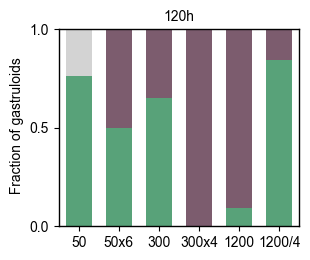

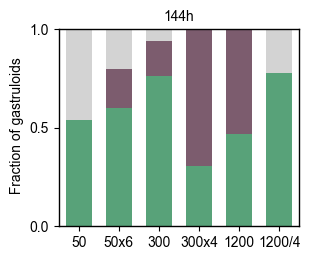

In [13]:
cond_orders = ['50','50x6', '300','300x4',   '1200',  '1200/4',  ]

for rep in [1]:
    df_r = df_exp_stats[df_exp_stats['Replicate'] == rep]
    
    for t in df_r.TimePt.unique():
        if t < 100:
            continue
        df_t = df_r[df_r['TimePt'] == t]
        fig, ax = plt.subplots(figsize=(3.2,2.7))
        
        for i, c in enumerate(cond_orders):
            data_df = df_t[df_t['Condition'] == c]
            
            if len(data_df) > 1:
                N = np.sum(data_df['N']) - np.sum(data_df['other'])
                ratio_uni = np.sum(data_df['uniaxial']) / N
                ratio_multi = np.sum(data_df['multipolar']) / N
                ratio_coll = np.sum(data_df['collapsed']) / N
                
            else:
                N = data_df['N']-data_df['other']
                ratio_uni = data_df['uniaxial']/N
                ratio_multi = data_df['multipolar']/N
                ratio_coll = data_df['collapsed']/N
            
            ax.bar(i, ratio_uni, width=0.65, color='seagreen', alpha=0.8)
            ax.bar(i, ratio_multi, width=0.65, color='#50263D', alpha=0.75, bottom=ratio_uni)
            ax.bar(i, ratio_coll, width=0.65, color='lightgray', alpha=1, bottom=ratio_uni+ratio_multi)
            
        
        ax.set_xticks(np.arange(6), labels=cond_orders)
        ax.set_title(f'{int(t)}h')
        ax.set_ylim(0,1)
        ax.set_xlim(-0.5, 5.5)
        ax.set_ylabel(f' Fraction of gastruloids')
        ax.set_yticks([0, 0.5, 1])
    
        
        fig.tight_layout()
        #plt.savefig(save_path + f'olympus_3X_fusion_elon_multi_coll_{rep}_{int(t)}_comp.svg', dpi=200, transparent=True)
        
        plt.show()